# Big Data (UBA) -  2024

## Trabajo Práctico 3 

### Grupo 2
- Jimena Teran 
- Juan Lynch
- Renzo Falciglia

### Parte I: Analizando la base

#### Ejercicio 2
En este ejercicio se hace una limpieza de la base de datos y un primer análisis exploratorio.

In [ ]:
#INCISO A

#Importamos los paquetes necesarios y cargamos el archivo del 1T de 2004

import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import numpy as np

#Cargamos archivo .sav
ruta_sav = "EPH_1T2004/Individual_t104.sav"
df_2004, meta_2004 = pyreadstat.read_sav(ruta_sav)

#Vemos el data frame
print(df_2004.head())


   CODUSU  nro_hogar  componente  h15    ano4  trimestre  region mas_500  \
0  125098        1.0         1.0  1.0  2004.0        1.0     1.0       S   
1  125397        1.0         1.0  1.0  2004.0        1.0     1.0       S   
2  125515        1.0         1.0  1.0  2004.0        1.0     1.0       S   
3  125558        1.0         1.0  1.0  2004.0        1.0     1.0       S   
4  125558        1.0         2.0  1.0  2004.0        1.0     1.0       S   

   aglomerado  pondera  ...  deccfr  ideccfr  rdeccfr  gdeccfr  pdeccfr  \
0        32.0   1299.0  ...      07                06       06            
1        32.0   2018.0  ...      00                00       00            
2        32.0   1486.0  ...      07                07       07            
3        32.0   1674.0  ...      08                08       08            
4        32.0   1674.0  ...      08                08       08            

   adeccfr  pj1_1  pj2_1  pj3_1  idimpp  
0       04    0.0    0.0    0.0   00000  
1       

In [2]:
#Cargamos el archivo del 1T 2024

#Cargamos el archivo archivo .txt
ruta_txt = "EPH_1T2024/usu_individual_T124.txt"
df_2024 = pd.read_csv(ruta_txt, delimiter=";")  

# Mostrar las primeras filas
print(df_2024.head())

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           3    1   
1  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           4    1   
2  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           5    0   
3  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           1    1   
4  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           2    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR    IPCF  DECCFR  \
0      42       S          10      439  ...      NaN       12       0      12   
1      42       S          10      439  ...      NaN       12       0      12   
2      42       S          10      439  ...      NaN       12       0      12   
3      42       S          10      675  ...      NaN        8  212500       6   
4      42       S          10      675  ...      NaN        8  212500       6   

   IDECCFR  RDECCFR  GDECC

C:\Users\renzo\AppData\Local\Temp\ipykernel_13896\3068888573.py:5: DtypeWarning: Columns (102,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv(ruta_txt, delimiter=";")


In [3]:
#Analizamos las columnas de cada data frame para hacer la unión

#Listas de columnas
variables_2004 = df_2004.columns.tolist()
variables_2024 = df_2024.columns.tolist()

print("Variables 2004:")
print(variables_2004)
print("\nVariables 2024:")
print(variables_2024)

Variables 2004:
['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08

In [4]:
#Primero convierto los nombres del df de 2004 a mayúscula así están igual en ambas bases

#Cambio los nombres
df_2004.columns = df_2004.columns.str.upper()

print(df_2004.columns)

Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR',
       'PJ1_1', 'PJ2_1', 'PJ3_1', 'IDIMPP'],
      dtype='object', length=176)


In [5]:
#Definimos las variables que necesitaremos de ambas bases para poder hacer la unión

variables_filtrar = ["AGLOMERADO", "CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF", "P21"]

#Filtramos en la base de 2004
df_2004_filtrado = df_2004[variables_filtrar]

#Filtramos en la base de 2024
df_2024_filtrado = df_2024[variables_filtrar]

In [10]:
#Unión de los df

#Ordenamos las columnas por si están en diferente orden
df_2024_filtrado = df_2024_filtrado[df_2004_filtrado.columns]

#Agregamos una columna de origen a cada df
df_2004_filtrado["ORIGEN"] = "T1_2004"
df_2024_filtrado["ORIGEN"] = "T1_2024"

#Unimos verticalmente y verificamos los resultados
df_union = pd.concat([df_2004_filtrado, df_2024_filtrado], ignore_index=True)

print(df_union.head())

   AGLOMERADO  CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  CAT_INAC   IPCF  \
0        32.0   1.0  79.0   4.0   1.0       3.0     3.0       1.0  368.0   
1        32.0   2.0  67.0   3.0   4.0       2.0     1.0       0.0    0.0   
2        32.0   2.0  74.0   4.0   1.0       2.0     3.0       1.0  440.0   
3        32.0   1.0  54.0   2.0   2.0       2.0     1.0       0.0  532.5   
4        32.0   2.0  51.0   2.0   2.0       6.0     3.0       4.0  532.5   

      P21   origen   ORIGEN  
0     0.0  T1_2004  T1_2004  
1     0.0  T1_2004  T1_2004  
2     0.0  T1_2004  T1_2004  
3  2000.0  T1_2004  T1_2004  
4     0.0  T1_2004  T1_2004  


C:\Users\renzo\AppData\Local\Temp\ipykernel_13896\87511415.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004_filtrado["ORIGEN"] = "T1_2004"


In [11]:
#Filtro los aglomerados que no corresponden a CABA o a partidos del Gran Buenos Aires

df_union_filtrado = df_union[df_union["AGLOMERADO"].isin([32, 33])]

print(df_union_filtrado.head())

   AGLOMERADO  CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  CAT_INAC   IPCF  \
0        32.0   1.0  79.0   4.0   1.0       3.0     3.0       1.0  368.0   
1        32.0   2.0  67.0   3.0   4.0       2.0     1.0       0.0    0.0   
2        32.0   2.0  74.0   4.0   1.0       2.0     3.0       1.0  440.0   
3        32.0   1.0  54.0   2.0   2.0       2.0     1.0       0.0  532.5   
4        32.0   2.0  51.0   2.0   2.0       6.0     3.0       4.0  532.5   

      P21   origen   ORIGEN  
0     0.0  T1_2004  T1_2004  
1     0.0  T1_2004  T1_2004  
2     0.0  T1_2004  T1_2004  
3  2000.0  T1_2004  T1_2004  
4     0.0  T1_2004  T1_2004  


In [12]:
#INCISO B

#Elimino las observaciones que tienen negativo en ingresos y en edad

df_union_filtrado = df_union_filtrado[(df_union_filtrado['CH06'] >= 0) & (df_union_filtrado['P21'] >= 0)]


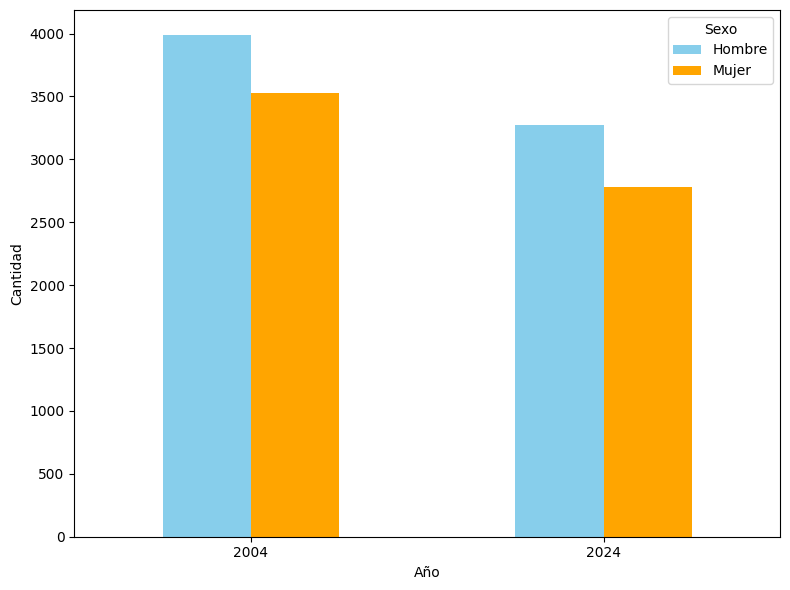

In [37]:
#INCISO C
#Preparamos los datos y creamos un gráfico de barras por sexo en cada año

#Filtramos los datos por año
df_2024 = df_union_filtrado[(df_union_filtrado['ORIGEN'] == "T1_2024") & (df_union_filtrado['CH04'].notna())]
df_2004 = df_union_filtrado[(df_union_filtrado['ORIGEN'] == "T1_2004") & (df_union_filtrado['CH04'].notna())]

#Contamos la cantidad por año
conteo_2024 = df_2024['CH04'].value_counts()
conteo_2004 = df_2004['CH04'].value_counts()

#Creamos el df necesario para el gráfico
df_composicion = pd.DataFrame({
    '2004': conteo_2004,
    '2024': conteo_2024
}).fillna(0)

#Mapeamos las etiquetas 
etiquetas = {1: "Hombre", 2: "Mujer"}
df_composicion.index = df_composicion.index.map(etiquetas)

# Creamos el gráfico de barras
df_composicion.T.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange'])
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(['Hombre', 'Mujer'], title='Sexo', loc='upper right')  # Leyenda en la esquina superior derecha
plt.tight_layout()
plt.show()


In [ ]:
#INCISO D

In [ ]:
#INCISO E

#### Ejercicio 3
En este ejercicio se divide la base entre aquellas personas que hayan respondido y las que no

In [ ]:
#Analizamos que cantidad de personas no respondió la encuesta tanto en 2024 como en 2004

conteo_1T2024 = ((df_union_filtrado['ESTADO'] == 0) & (df_union_filtrado['ORIGEN'] == 'T1_2024')).sum()
conteo_1T2004 = ((df_union_filtrado['ESTADO'] == 0) & (df_union_filtrado['ORIGEN'] == 'T1_2004')).sum()

print(f"Cantidad de personas que no respondieron su condición de actividad en 2024: {conteo_1T2024}")
print(f"Cantidad de personas que no respondieron su condición de actividad en 2004: {conteo_1T2004}")

Cantidad de personas que no respondieron su condición de actividad en 2024: 41
Cantidad de personas que no respondieron su condición de actividad en 2004: 10


In [25]:
#Creamos un df con las personas que respondieron (ESTADO <> 0)
respondieron = df_union_filtrado[df_union_filtrado['ESTADO'] != 0]

#Y creamos otro df con las personas que no respondieron (ESTADO = 0)
no_respondieron = df_union_filtrado[df_union_filtrado['ESTADO'] == 0]

#Calculamos el tamaño de cada uno en filas

cantidad_respondieron = len(respondieron)
cantidad_no_respondieron = len(no_respondieron)

print(f"Cantidad de personas que respondieron: {cantidad_respondieron}")
print(f"Cantidad de personas que no respondieron: {cantidad_no_respondieron}")

Cantidad de personas que respondieron: 13519
Cantidad de personas que no respondieron: 51
